In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
retail_price_data = pd.read_csv("car_data.csv")
retail_price_data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


/Users/Artyom/Documents/TIY/week4/plaid_coat/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


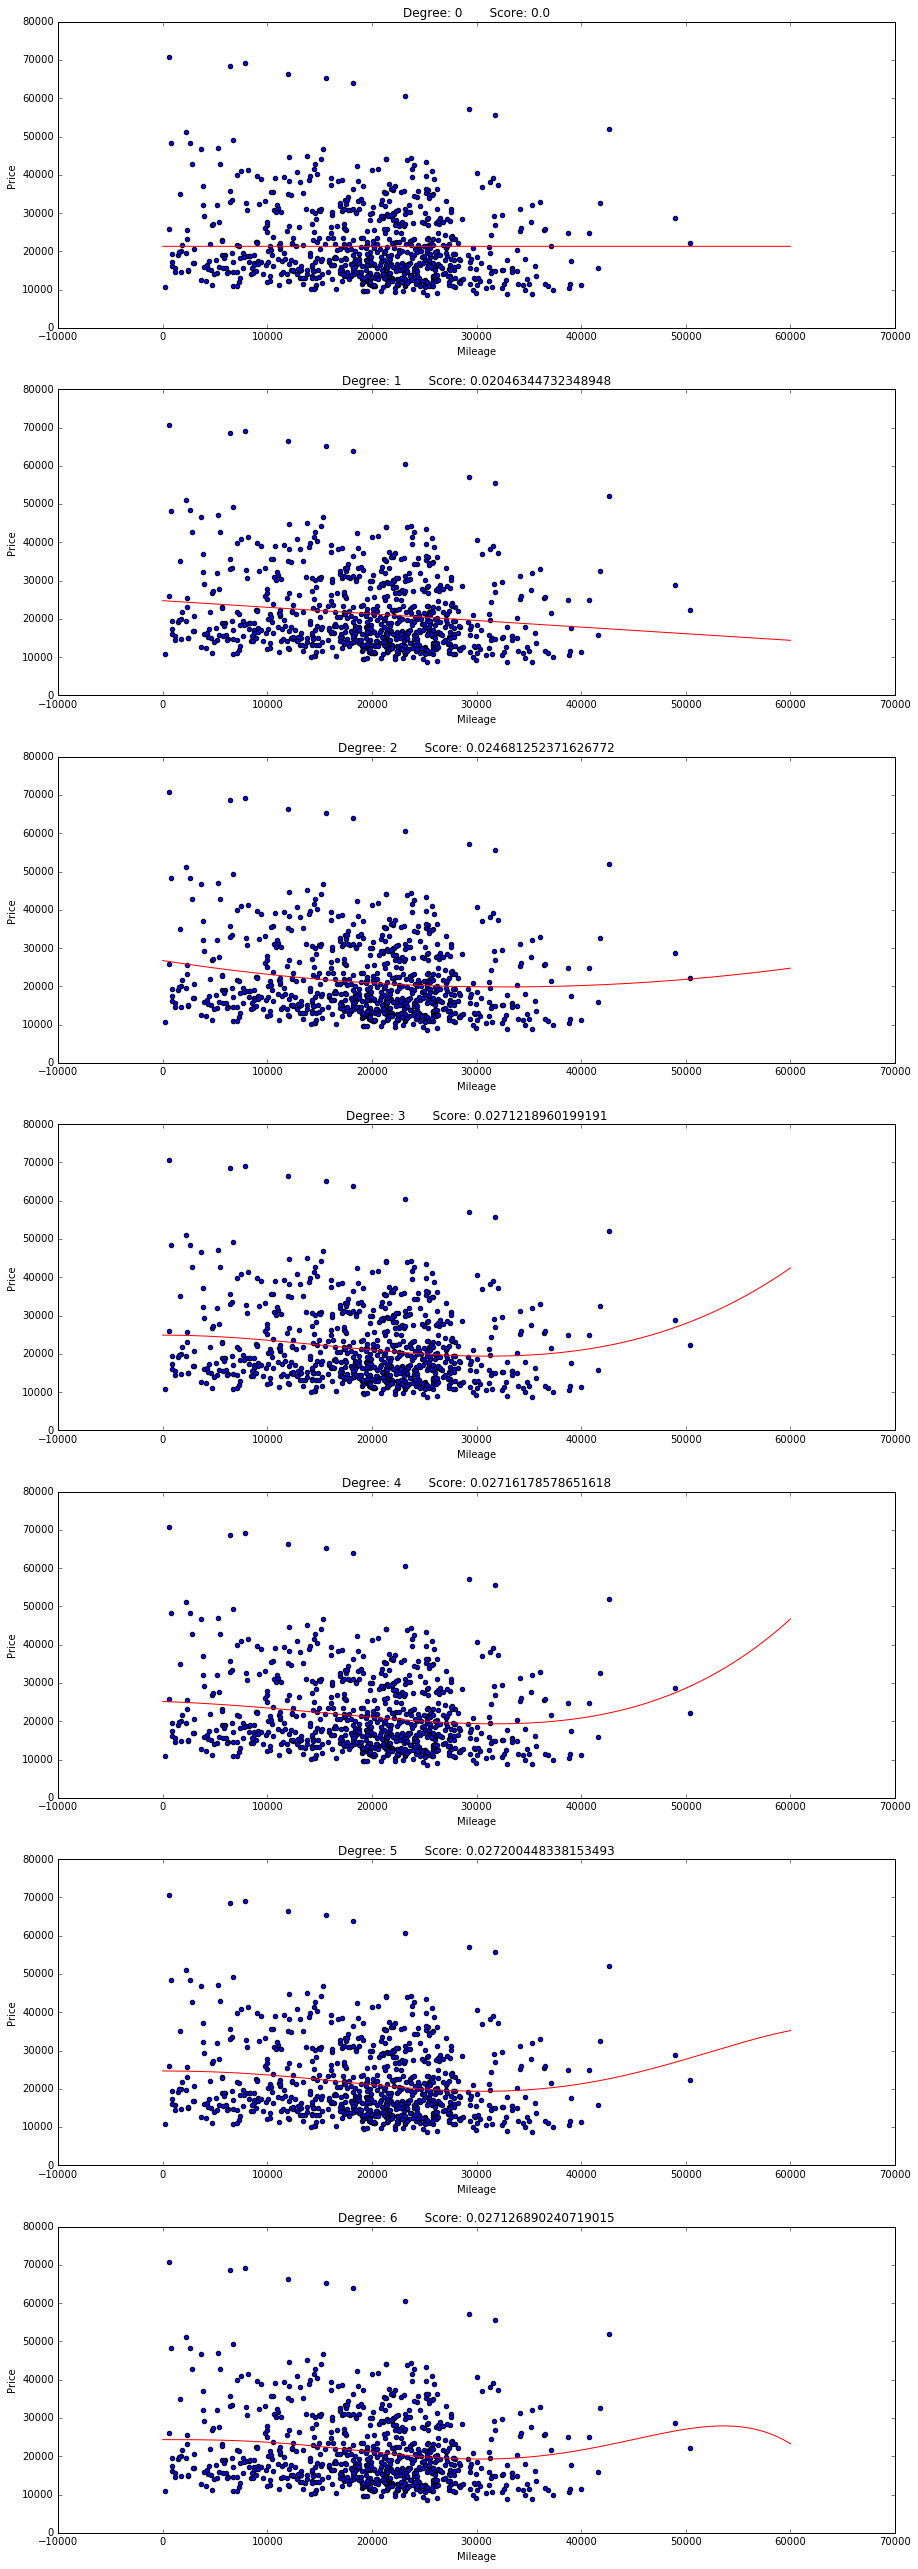

In [3]:
feature_cols = ['Mileage']
X = retail_price_data[feature_cols]
y = retail_price_data['Price']

degrees = 7
fig, axs = plt.subplots(degrees, figsize = (15, 45))
linreg = LinearRegression()

for degree in range(degrees):
    
    model = make_pipeline(PolynomialFeatures(degree), linreg)
    model.fit(X, y)

    subplot = axs[degree]
    subplot.scatter(X, y)
    xs = range(60000)
    subplot.plot(xs, model.predict([[k] for k in xs]), color='red')
    r_score = model.score(X, y)
    subplot.set_xlabel('Mileage')
    subplot.set_ylabel('Price')
    subplot.set_title('Degree: {}       Score: {}'.format(degree, r_score))

In [4]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = retail_price_data[columns]
y = retail_price_data['Price']

linreg2 = LinearRegression()
linreg2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
print('Intercept:', linreg2.intercept_)
print('Coefficient:', linreg2.coef_)
print('Score:', linreg2.score(X, y))

Intercept: 6758.7551436
Coefficient: [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
Score: 0.446264353673


In [6]:
combinations_list = []
for item in range(1, 8):
    combinations_list.append(itertools.combinations(columns, item))

my_score = 0
for item in combinations_list:
    for columns in item:
        columns = list(columns)
        x_price = retail_price_data[columns]
        price_linreg = LinearRegression()
        price_linreg.fit(x_price, y)
        if my_score < price_linreg.score(x_price, y):
            my_score = price_linreg.score(x_price, y)
print(columns, '\nBest R-squared Score:', my_score)

['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 
Best R-squared Score: 0.446264353673
